## Import Data , EDA and Visualization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("churndata.csv")

print(df['Churn'].value_counts(normalize=True))

df.head()

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Text(0.5, 1.0, 'Target Distribution')

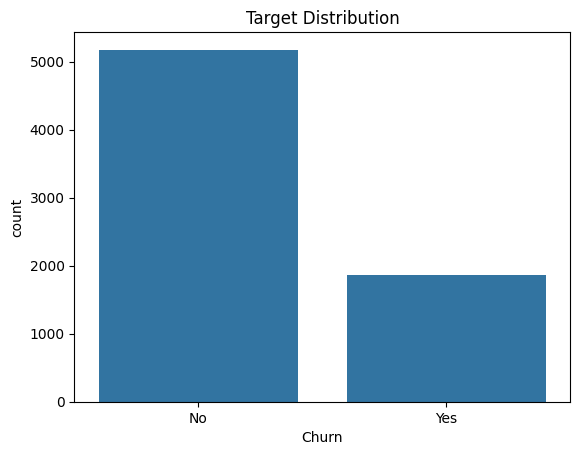

In [3]:
sns.countplot(x='Churn', data=df)
plt.title('Target Distribution')

Text(0.5, 0.98, 'Distributions of Numerical Features')

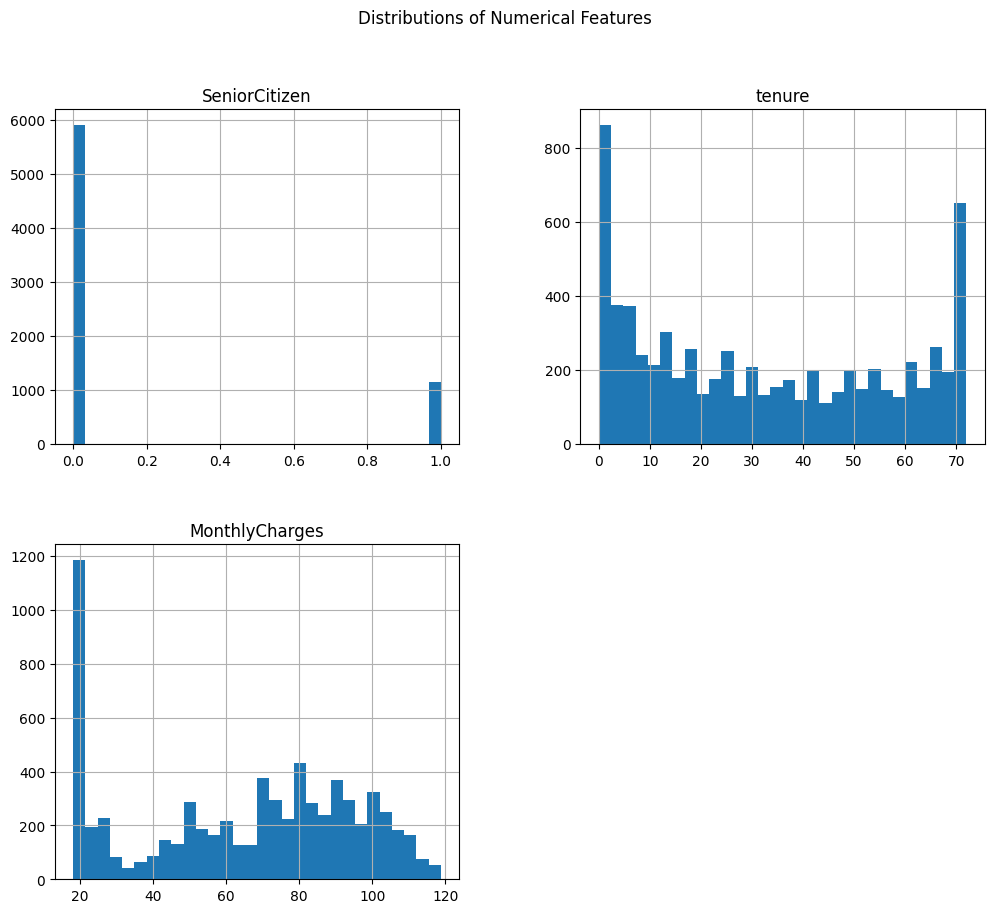

In [4]:
numerics = df.select_dtypes(include='number').columns
df[numerics].hist(figsize=(12, 10), bins=30)
plt.suptitle('Distributions of Numerical Features')


<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

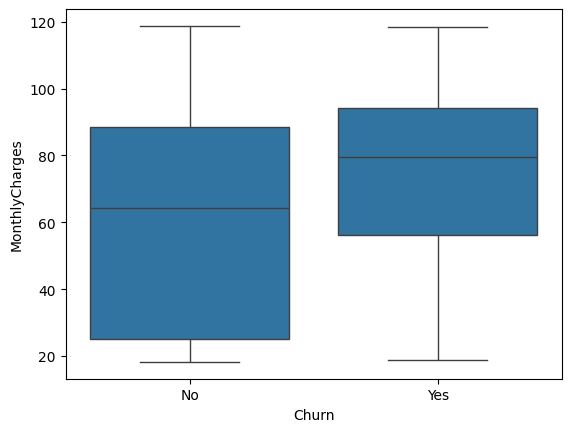

In [5]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)

<Axes: xlabel='Contract', ylabel='count'>

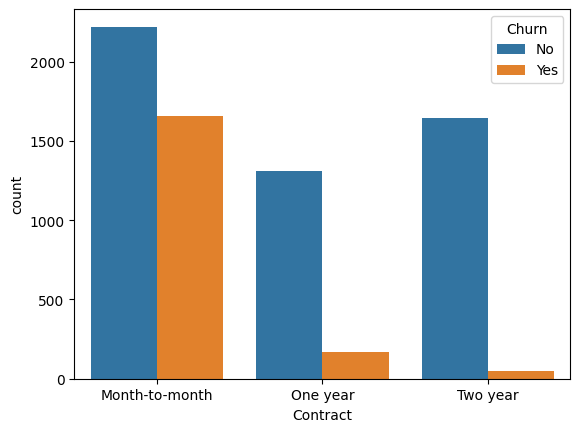

In [6]:
sns.countplot(x='Contract', hue='Churn', data=df)

## Preprocessing

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
df.drop('customerID', axis=1, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})
df['Partner'] = df['Partner'].replace({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].replace({'Yes': 1, 'No': 0})
df['PhoneService'] = df['PhoneService'].replace({'Yes': 1, 'No': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].replace({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})
df['OnlineSecurity'] = df['OnlineSecurity'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
df['OnlineBackup'] = df['OnlineBackup'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
df['DeviceProtection'] = df['DeviceProtection'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
df['TechSupport'] = df['TechSupport'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
df['StreamingMovies'] = df['StreamingMovies'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
df['StreamingTV'] = df['StreamingTV'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
df.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26900\1843654113.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26900\1843654113.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Partner'] = df['Partner'].replace({'Yes': 1, 'No': 0})
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26900\1843654113.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the o

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [10]:
df['StreamingMovies'] = df['StreamingMovies'].astype(int)
df['StreamingTV'] = df['StreamingTV'].astype(int)
df['OnlineBackup'] = df['OnlineBackup'].astype(int)
df['DeviceProtection'] = df['DeviceProtection'].astype(int)
df['TechSupport'] = df['TechSupport'].astype(int)
df['OnlineSecurity'] = df['OnlineSecurity'].astype(int)
df['TotalCharges'] = df['TotalCharges'].replace(' ', None).astype(float)
df['MonthlyCharges'] = df['MonthlyCharges'].astype(float)
df['tenure'] = df['tenure'].astype(int)

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder as ohe

imputer = SimpleImputer(strategy='mean')
df['TotalCharges'] = imputer.fit_transform(df[['TotalCharges']])



ohe = ohe()
df['PaymentMethod'] = ohe.fit_transform(df[['PaymentMethod']]).toarray()
df['Contract'] = ohe.fit_transform(df[['Contract']]).toarray()
df['InternetService'] = ohe.fit_transform(df[['InternetService']]).toarray()
df['MultipleLines'] = ohe.fit_transform(df[['MultipleLines']]).toarray()

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

# فرض: df دیتافریم اصلی با ستون 'Churn'

# جدا کردن کلاس‌ها
class_0 = df[df['Churn'] == 0]
class_1 = df[df['Churn'] == 1]

# متعادل‌سازی: تعداد کلاس ۰ برابر با کلاس ۱
class_0_balanced = class_0.sample(n=len(class_1), random_state=42)

# ترکیب کلاس‌ها
df = pd.concat([class_0_balanced, class_1])

# در هم زدن داده‌ها
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# جدا کردن ویژگی‌ها و هدف
X = df.drop('Churn', axis=1)
y = df['Churn']

# تقسیم داده به train/test (مثلاً 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)



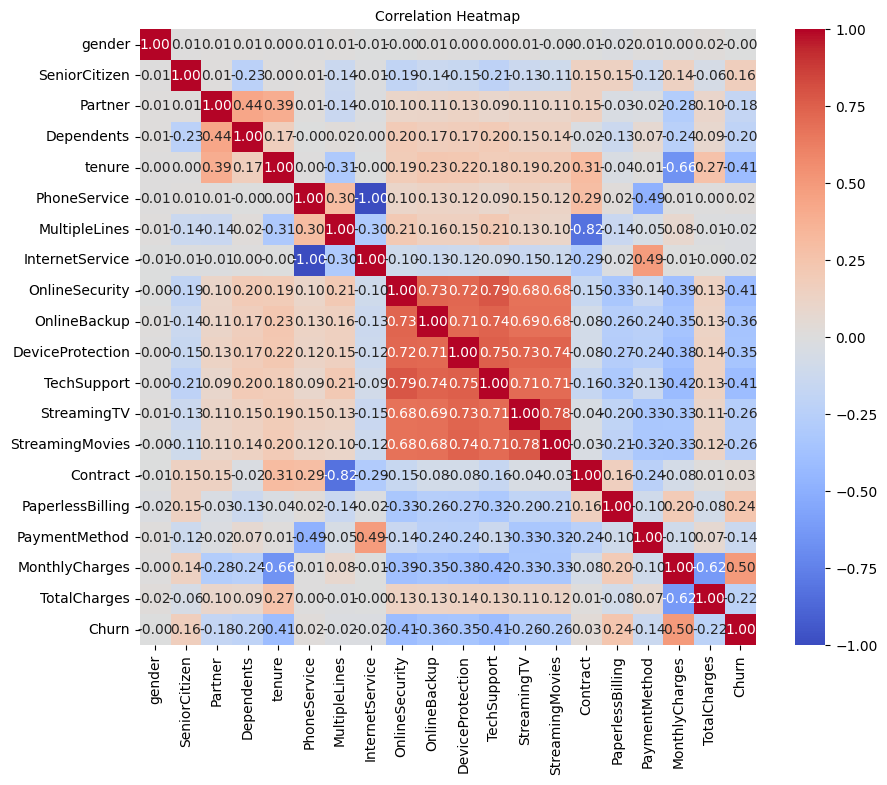

In [13]:
corr_matrix = df.corr()

# تنظیم اندازه شکل
plt.figure(figsize=(10, 8))

# رسم heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# اضافه کردن عنوان
plt.title("Correlation Heatmap", fontsize=10)

# نمایش شکل
plt.show()

In [14]:
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(X_train[['InternetService', 'PhoneService']])
X_pca_test = pca.transform(X_test[['InternetService', 'PhoneService']])

# تبدیل به دیتافریم و دادن نام به ستون‌ها
import pandas as pd
X_pca_train = pd.DataFrame(X_pca_train, columns=['Ps1', 'Ps2'], index=X_train.index)
X_pca_test = pd.DataFrame(X_pca_test, columns=['Ps1', 'Ps2'], index=X_test.index)

# حذف ستون‌های اولیه از دیتاست اصلی (اختیاری)
X_train = X_train.drop(columns=['InternetService', 'PhoneService'])
X_test = X_test.drop(columns=['InternetService', 'PhoneService'])

# الحاق مؤلفه‌های PCA به دیتاست
X_train = pd.concat([X_train, X_pca_train], axis=1)
X_test = pd.concat([X_test, X_pca_test], axis=1)

In [15]:
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(X_train[['OnlineSecurity', 'MonthlyCharges']])
X_pca_test = pca.transform(X_test[['OnlineSecurity', 'MonthlyCharges']])

# تبدیل به دیتافریم و دادن نام به ستون‌ها
import pandas as pd
X_pca_train = pd.DataFrame(X_pca_train, columns=['Pt1', 'Pt2'], index=X_train.index)
X_pca_test = pd.DataFrame(X_pca_test, columns=['Pt1', 'Pt2'], index=X_test.index)

# حذف ستون‌های اولیه از دیتاست اصلی (اختیاری)
X_train = X_train.drop(columns=['OnlineSecurity', 'MonthlyCharges'])
X_test = X_test.drop(columns=['OnlineSecurity', 'MonthlyCharges'])

# الحاق مؤلفه‌های PCA به دیتاست
X_train = pd.concat([X_train, X_pca_train], axis=1)
X_test = pd.concat([X_test, X_pca_test], axis=1)

In [16]:
# اجرای PCA فقط روی دو ستون خاص
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(X_train[['tenure', 'TotalCharges']])
X_pca_test = pca.transform(X_test[['tenure', 'TotalCharges']])

# تبدیل به دیتافریم و دادن نام به ستون‌ها
import pandas as pd
X_pca_train = pd.DataFrame(X_pca_train, columns=['PC1', 'PC2'], index=X_train.index)
X_pca_test = pd.DataFrame(X_pca_test, columns=['PC1', 'PC2'], index=X_test.index)

# حذف ستون‌های اولیه از دیتاست اصلی (اختیاری)
X_train = X_train.drop(columns=['tenure', 'TotalCharges'])
X_test = X_test.drop(columns=['tenure', 'TotalCharges'])

# الحاق مؤلفه‌های PCA به دیتاست
X_train = pd.concat([X_train, X_pca_train], axis=1)
X_test = pd.concat([X_test, X_pca_test], axis=1)


In [17]:
from sklearn.preprocessing import RobustScaler as rb
X_train = rb().fit_transform(X_train)
X_test = rb().fit_transform(X_test)

## Modelling

In [24]:
import optuna
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings

warnings.filterwarnings("ignore")

# تعریف وزن کلاس‌ها
class_weights = {0: 1, 1: 3}

def objective(trial, X_train, X_test, y_train, y_test):
    # پارامترهای RandomForest
    rf_n = trial.suggest_int("rf_n_estimators", 50, 200)
    rf_depth = trial.suggest_int("rf_max_depth", 3, 20)

    # پارامترهای XGBoost
    xgb_n = trial.suggest_int("xgb_n_estimators", 50, 200)
    xgb_depth = trial.suggest_int("xgb_max_depth", 3, 10)

    # پارامترهای LightGBM
    lgb_n = trial.suggest_int("lgb_n_estimators", 50, 200)
    lgb_depth = trial.suggest_int("lgb_max_depth", 3, 20)
    lgb_lr = trial.suggest_float("lgb_learning_rate", 0.01, 0.3, log=True)

    # پارامترهای LogisticRegression نهایی
    lr_C = trial.suggest_float("lr_C", 1e-3, 10, log=True)

    # SMOTE روی داده train
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_train, y_train)

    # تعریف base learners
    estimators = [
        ('rf', RandomForestClassifier(
            n_estimators=rf_n,
            max_depth=rf_depth,
            class_weight=class_weights,
            random_state=42
        )),
        ('xgb', XGBClassifier(
            n_estimators=xgb_n,
            max_depth=xgb_depth,
            use_label_encoder=False,
            eval_metric='logloss',
            scale_pos_weight=3,  # نسبت وزن کلاس 1 به 0
            random_state=42
        )),
        ('lgb', LGBMClassifier(
            n_estimators=lgb_n,
            max_depth=lgb_depth,
            learning_rate=lgb_lr,
            class_weight=class_weights,
            random_state=42
        ))
    ]

    final_estimator = LogisticRegression(
        C=lr_C,
        max_iter=500,
        class_weight=class_weights,
        random_state=42
    )

    model = StackingClassifier(
        estimators=estimators,
        final_estimator=final_estimator,
        cv=3,
        n_jobs=-1
    )

    model.fit(X_res, y_res)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)

    return f1

# تقسیم‌بندی داده‌ها (فرض بر این است که X, y از قبل تعریف شده‌اند)
# اگر ندارید، قبلش این را اضافه کنید:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: objective(trial, X_train, X_test, y_train, y_test), n_trials=30)

print("✅ بهترین پارامترها:", study.best_params)

# آموزش نهایی با بهترین پارامترها
best = study.best_params

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

estimators = [
    ('rf', RandomForestClassifier(
        n_estimators=best['rf_n_estimators'],
        max_depth=best['rf_max_depth'],
        class_weight=class_weights,
        random_state=42
    )),
    ('xgb', XGBClassifier(
        n_estimators=best['xgb_n_estimators'],
        max_depth=best['xgb_max_depth'],
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=3,
        random_state=42
    )),
    ('lgb', LGBMClassifier(
        n_estimators=best['lgb_n_estimators'],
        max_depth=best['lgb_max_depth'],
        learning_rate=best['lgb_learning_rate'],
        class_weight=class_weights,
        random_state=42
    ))
]

final_estimator = LogisticRegression(
    C=best['lr_C'],
    max_iter=500,
    class_weight=class_weights,
    random_state=42
)

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5,
    n_jobs=-1
)

stacking_clf.fit(X_resampled, y_resampled)
y_pred_final = stacking_clf.predict(X_test)

# ارزیابی نهایی
print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_final))
print("📄 Classification Report:\n", classification_report(y_test, y_pred_final))


[I 2025-07-13 15:33:01,181] A new study created in memory with name: no-name-69243e69-b5a8-497a-b999-6de4ac25081f
[I 2025-07-13 15:33:02,735] Trial 0 finished with value: 0.7898789878987899 and parameters: {'rf_n_estimators': 167, 'rf_max_depth': 13, 'xgb_n_estimators': 169, 'xgb_max_depth': 5, 'lgb_n_estimators': 145, 'lgb_max_depth': 13, 'lgb_learning_rate': 0.06711582051490109, 'lr_C': 0.04142250002886024}. Best is trial 0 with value: 0.7898789878987899.
[I 2025-07-13 15:33:03,992] Trial 1 finished with value: 0.6666666666666666 and parameters: {'rf_n_estimators': 133, 'rf_max_depth': 17, 'xgb_n_estimators': 79, 'xgb_max_depth': 4, 'lgb_n_estimators': 139, 'lgb_max_depth': 17, 'lgb_learning_rate': 0.11811166002373233, 'lr_C': 0.001405942128777501}. Best is trial 0 with value: 0.7898789878987899.
[I 2025-07-13 15:33:05,382] Trial 2 finished with value: 0.7811816192560175 and parameters: {'rf_n_estimators': 154, 'rf_max_depth': 18, 'xgb_n_estimators': 130, 'xgb_max_depth': 6, 'lgb_n_e

✅ بهترین پارامترها: {'rf_n_estimators': 138, 'rf_max_depth': 12, 'xgb_n_estimators': 93, 'xgb_max_depth': 4, 'lgb_n_estimators': 125, 'lgb_max_depth': 5, 'lgb_learning_rate': 0.04950134718922648, 'lr_C': 2.399797149752247}
📊 Confusion Matrix:
 [[216 158]
 [ 22 352]]
📄 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.58      0.71       374
           1       0.69      0.94      0.80       374

    accuracy                           0.76       748
   macro avg       0.80      0.76      0.75       748
weighted avg       0.80      0.76      0.75       748



## Evaluation Metrics

In [26]:
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_final))


📋 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.58      0.71       374
           1       0.69      0.94      0.80       374

    accuracy                           0.76       748
   macro avg       0.80      0.76      0.75       748
weighted avg       0.80      0.76      0.75       748



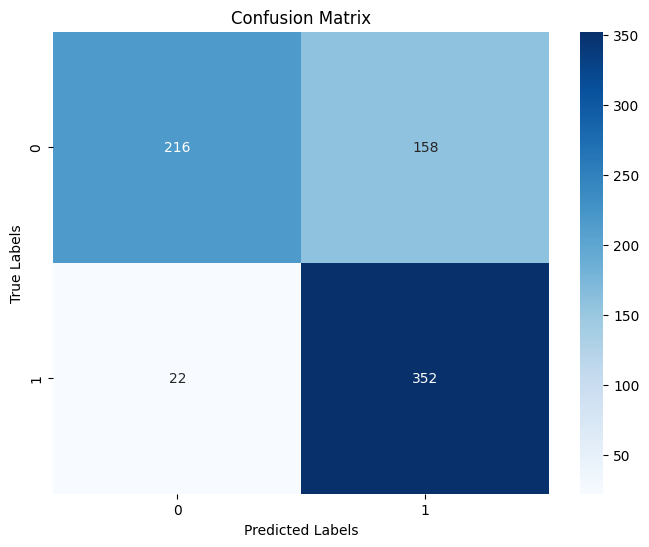

In [27]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_final)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

✅ Best Threshold: 0.542
📈 Best F1 Score: 0.803


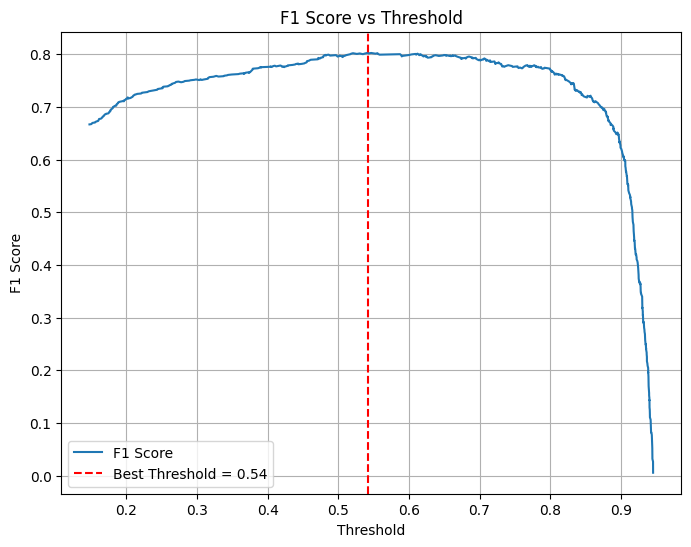

In [28]:
from sklearn.metrics import precision_recall_curve, f1_score
import numpy as np
import matplotlib.pyplot as plt

# احتمال‌ها برای کلاس 1
y_scores = stacking_clf.predict_proba(X_test)[:, 1]

# محاسبه precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# محاسبه F1 برای هر threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)

# پیدا کردن بهترین threshold
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"✅ Best Threshold: {best_threshold:.3f}")
print(f"📈 Best F1 Score: {best_f1:.3f}")

y_pred_best = (y_scores >= best_threshold).astype(int)

# رسم نمودار
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores[:-1], label='F1 Score')
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Best Threshold = {best_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.legend()
plt.grid(True)
plt.show()


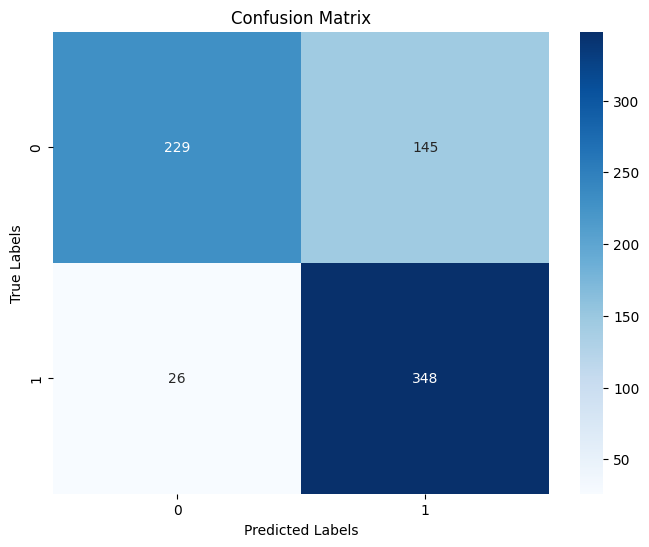

In [29]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()